# Set up environment

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git@main

In [39]:
import pandas as pd
import os
from PIL import Image
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt


# Load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/')

In [6]:
import zipfile

zip_file = 'insta_posts_captions.zip'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/insta_posts_captions')


# Create the pytorch dataset

In [14]:
image_folder = '/content/drive/My Drive/insta_posts_captions/instagram_data/img'
captions = pd.read_csv("/content/drive/My Drive/insta_posts_captions/instagram_data/captions_csv.csv")
print("Len of data before dropping na: ", captions.shape)
captions = captions.dropna()
print("Len of data after dropping na: ", captions.shape)

Len of data before dropping na:  (20515, 3)
Len of data after dropping na:  (17100, 3)


In [19]:
captions.head()

,Sr No,Image File,Caption
1,2,img/insta2,bye
2,3,img/insta3,"Ok, a few more... sorry I just had so much fun..."
3,4,img/insta4,This was one of my favorite shoots I’ve ever d...
4,5,img/insta5,Wrapped round my finger like a ring
5,6,img/insta6,Yesterday was so much fun!! has been such a hu...


In [72]:
img_path = '/content/drive/My Drive/insta_posts_captions/instagram_data/'
img_name = os.path.join(img_path, captions.iloc[4, 1] + ".jpg")
image = Image.open(img_name).convert('RGB')
caption = captions.iloc[0, 1]

In [73]:
image.size

(1080, 902)

In [74]:
transform = transforms.Compose([
    transforms.Resize((1080, 1080)),  # Resize to a common size
    # transforms.Normalize((0.5, 0.5), (0.5, 0.5))
    ])

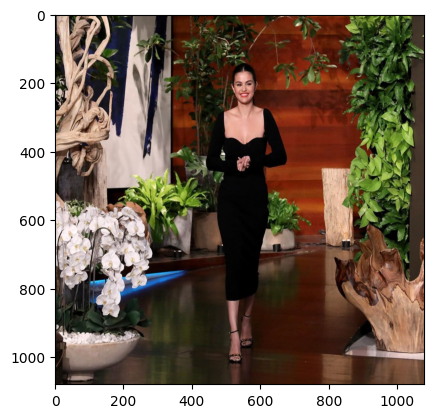

In [75]:
image = transform(image)
plt.imshow(image)

# Load Model

In [86]:
from transformers import AutoProcessor, BlipForConditionalGeneration

processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [88]:
# prompt = "Question: What would be an idea instagram caption for this image? Answer:"
inputs = processor(images=image, return_tensors="pt")
generated_ids = model.generate(**inputs, max_new_tokens=100, max_length=100)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
generated_text

Both `max_new_tokens` (=100) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


'a woman in a black dress walks down the runway'

In [90]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("prasanthsagirala/text-to-social-media-captions")
model = AutoModelForSeq2SeqLM.from_pretrained("prasanthsagirala/text-to-social-media-captions")

In [91]:
inputs = ["captionize: " + generated_text]
inputs = tokenizer(inputs, max_length=512, truncation=True, return_tensors="pt")
output = model.generate(**inputs, num_beams=8, do_sample=True, min_length=10, max_length=64)
decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0]

In [92]:
decoded_output

'"Fashion meets fashion, as a woman in a black dress walks down the runway in a black dress."'

# Training

# Inference

# Save the model